In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

In [14]:
ticket = yf.Ticker('PETR4.SA')
df = ticket.history(interval='1d', start= '2018-01-01', end= '2024-09-21')

# df = ticket.history(period = '2y', interval = '1d')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-16 00:00:00-03:00,37.240002,37.720001,37.160000,37.209999,22614800,0.0,0.0
2024-09-17 00:00:00-03:00,37.169998,37.189999,36.700001,37.040001,23443700,0.0,0.0
2024-09-18 00:00:00-03:00,36.910000,36.930000,36.150002,36.150002,38777000,0.0,0.0
2024-09-19 00:00:00-03:00,36.570000,36.779999,36.189999,36.270000,25059700,0.0,0.0
2024-09-20 00:00:00-03:00,36.270000,36.400002,36.070000,36.259998,48336200,0.0,0.0


<Axes: xlabel='Date'>

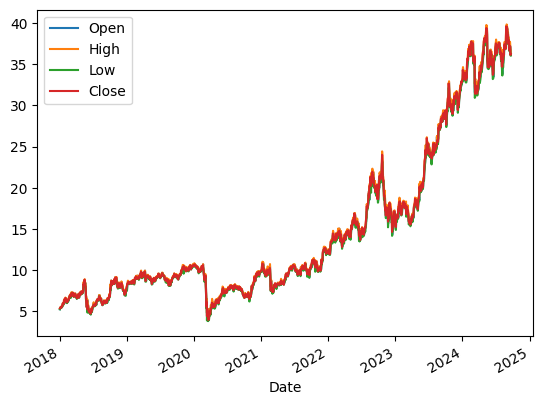

In [15]:
df[['Open', 'High', 'Low', 'Close']].plot()

In [16]:
# Decomposição da série temporal 

df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1671 entries, 2018-01-02 00:00:00-02:00 to 2024-09-20 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1671 non-null   float64
dtypes: float64(1)
memory usage: 26.1 KB


In [17]:
df.index[0]

Timestamp('2018-01-02 00:00:00-0200', tz='America/Sao_Paulo')

In [18]:
df.index[-1]

Timestamp('2024-09-20 00:00:00-0300', tz='America/Sao_Paulo')

In [19]:
df[['Close']].head()

,Close
Date,
2018-01-02 00:00:00-02:00,5.312315
2018-01-03 00:00:00-02:00,5.360464
2018-01-04 00:00:00-02:00,5.370093
2018-01-05 00:00:00-02:00,5.402192
2018-01-08 00:00:00-02:00,5.466390


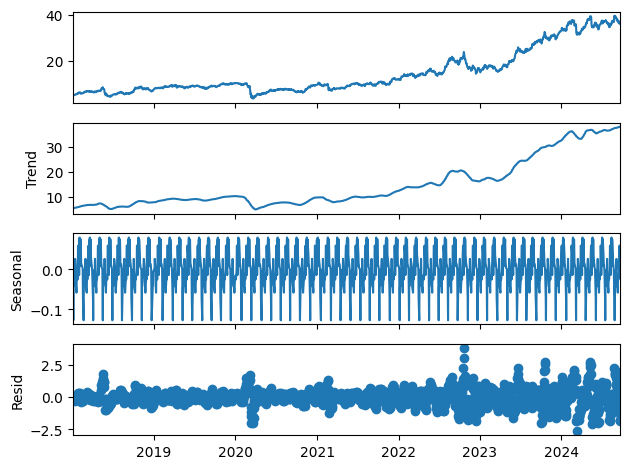

In [24]:
#Aditivo = level + tendência + sazonalidade + ruído
decomposicao = seasonal_decompose(df[['Close']],model = 'additive',  period=30, extrapolate_trend=30)
decomposicao.plot();

<Axes: xlabel='Date'>

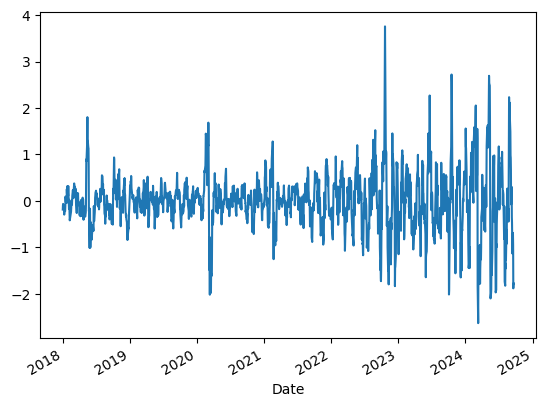

In [25]:
decomposicao.resid.plot()

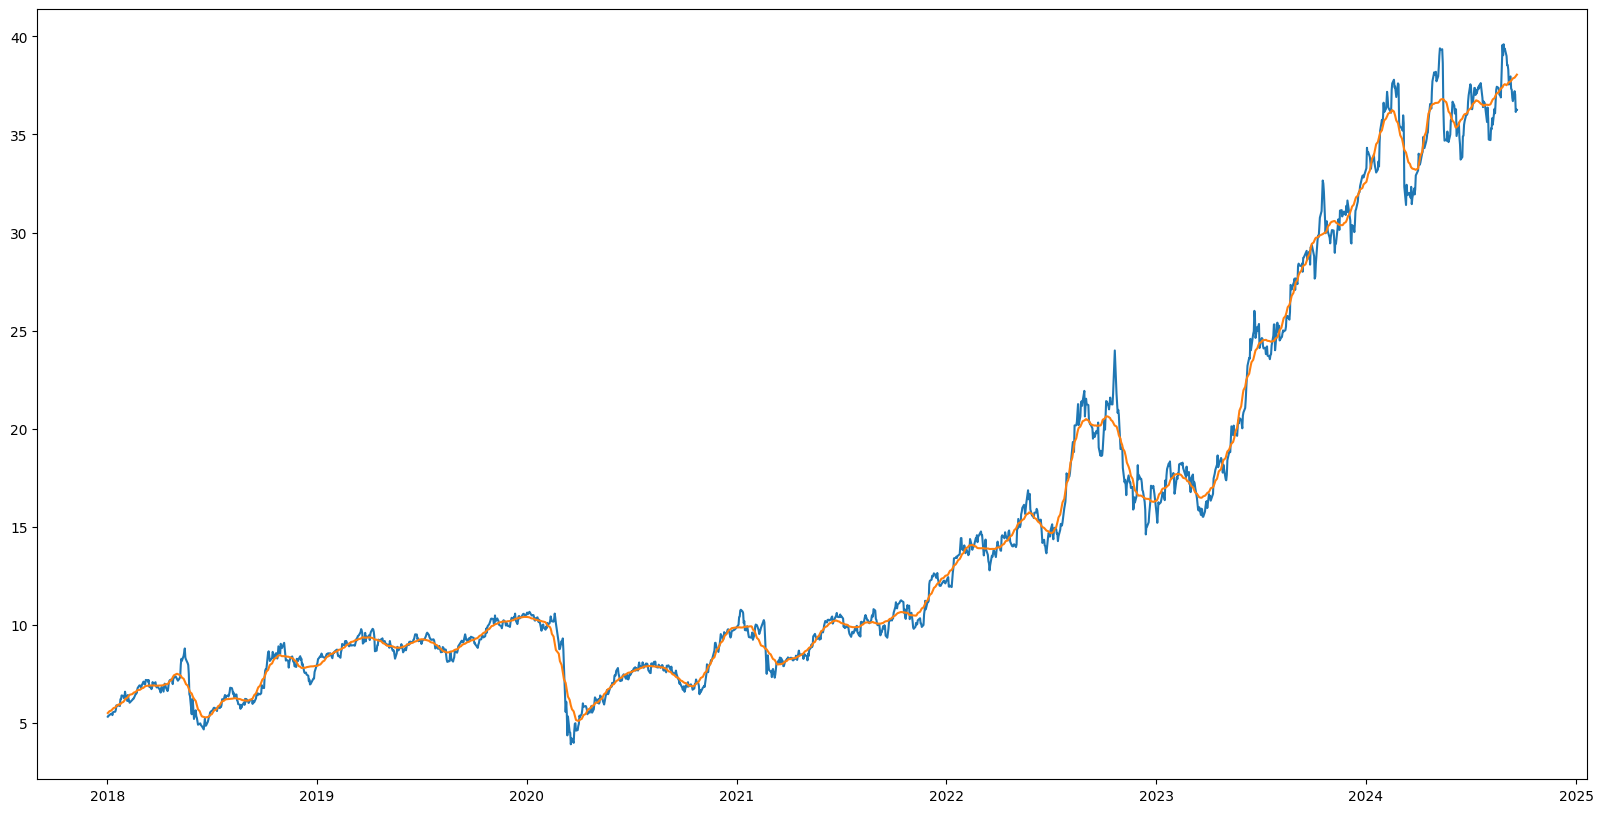

In [27]:
ax, fig = plt.subplots(figsize = (20,10))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

<Axes: xlabel='Date'>

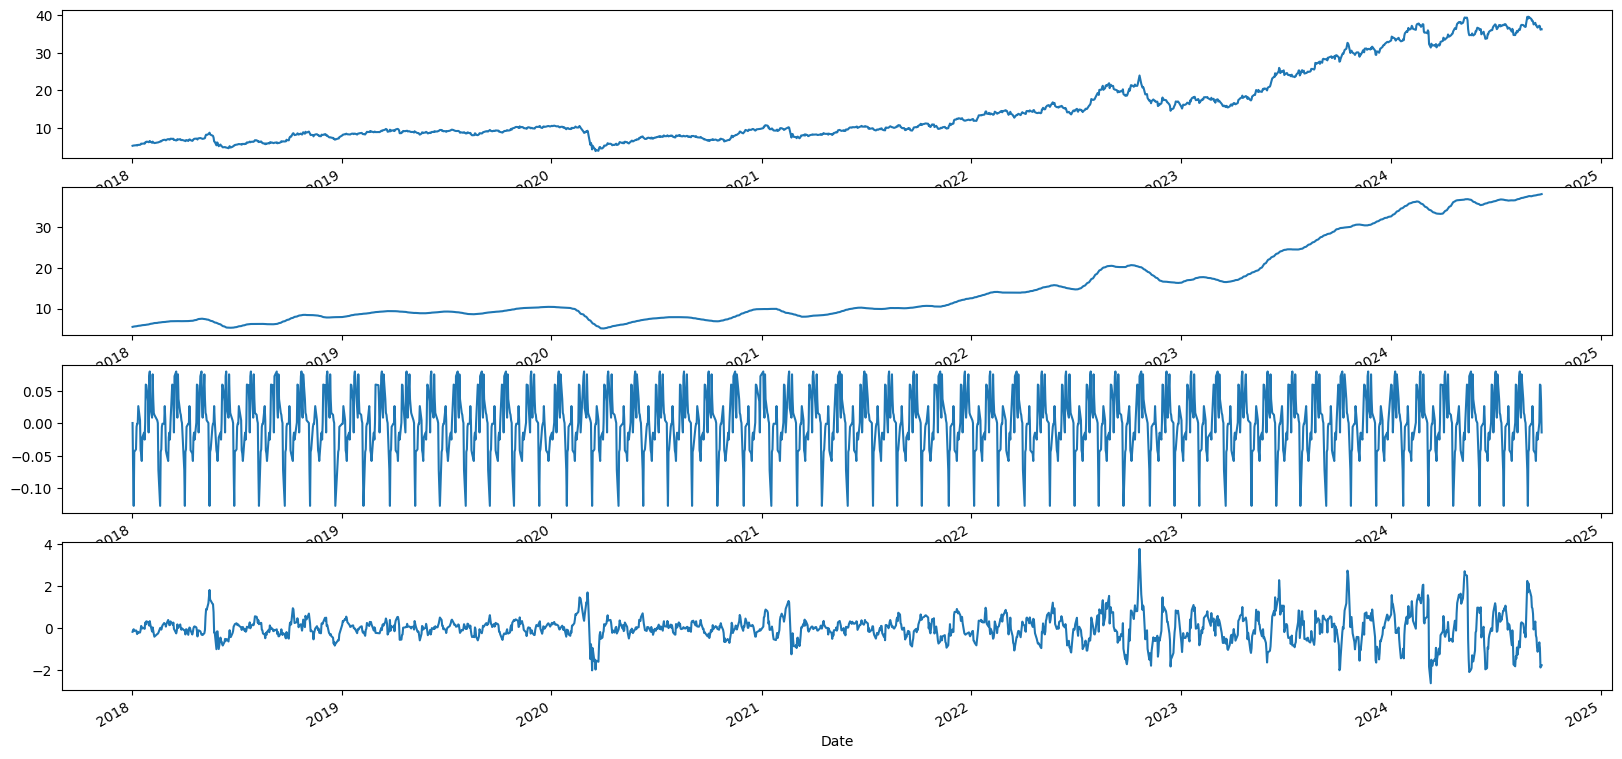

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (20,10))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)